In [1]:
# téléchargement

from pymatgen.symmetry import analyzer as az
from pymatgen.ext.matproj import MPRester
import pymatgen.analysis.diffraction.xrd as xr
from matplotlib import pyplot as plt

cle_materiau = "mp-20072"
cle_utilisateur = "om6hvHlirPcyuxXF"

with MPRester(cle_utilisateur) as m:
    structure = m.get_structure_by_material_id(cle_materiau)
    structure = az.SpacegroupAnalyzer(structure).get_primitive_standard_structure()

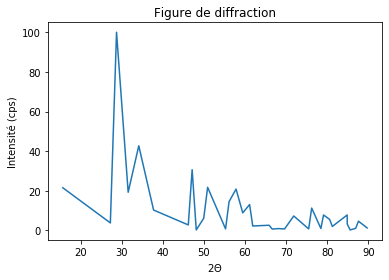

In [2]:
# on fait le calcul du pattern de diffraction pour notre structure
calc = xr.XRDCalculator()
pat = calc.get_pattern(structure)

# on fait un petit plot du pattern de diffraction pour avoir une idée de ce à quoi ça ressemble
y = pat.y
plt.plot(pat.x,y)
plt.xlabel('$ 2\Theta $')
plt.ylabel('Intensité (cps)')
plt.title('Figure de diffraction')
plt.show()

In [3]:
# petite fonction utilitaire avec exemple

def get_indexes(a, number=1,maxi=True):
    """
    donne dans un tableau les indices des 'numbers' premiers maximums du tableau 'a'
    par défaut, la fonction renvoie le maximum du tableau (numbers = 1)
    
    Si max est mis à 'False', la fonction ne cherche plus les indices des maximus
    mais ceux des minimums
    """
    index = [-1]*number
    if maxi:
        init_value = min(a)
        condition = lambda a,b : a > b
    else:
        init_value = max(a)
        condition = lambda a,b : a < b
    
    for i in range(number):
        max_min = init_value
        index_i = -1
        for j in range(len(a)):
            if condition(a[j],max_min)  and j not in index:
                max_min = a[j]
                index_i = j
        index[i] = index_i
    
    return index
    

# exemple 

a = [0,500,8,-5,12]
print('si a = '+str(a)+' et numbers = 2,')
print('le résultat est : '+str(get_indexes(a,2)))
print('ce qui donne bien les indices des 2 plus grandes valeurs du tableau')
print('\nsi on fait l\'opération avec max à False, on a : '+str(get_indexes(a,2,False)))
print('ce qui donne bien les indices des 2 plus petites valeurs du tableau')

si a = [0, 500, 8, -5, 12] et numbers = 2,
le résultat est : [1, 4]
ce qui donne bien les indices des 2 plus grandes valeurs du tableau

si on fait l'opération avec max à False, on a : [3, 0]
ce qui donne bien les indices des 2 plus petites valeurs du tableau


In [5]:
index = get_indexes(y,3)
    
hkls = pat.hkls
for i in index:
    dic = hkls[i][0]
    print('max : '+str(round(y[i],2))+'   indices hkl : '+str(dic['hkl'])+'   multiplicité : '+str(dic['multiplicity']))

max : 100.0   indices hkl : (1, 1, 0)   multiplicité : 6
max : 42.72   indices hkl : (2, 1, 1)   multiplicité : 6
max : 30.65   indices hkl : (1, 0, -1)   multiplicité : 6
